In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Example 1
In 2011, URL shortening service bit.ly partnered with the United States government website usa.gov to provide a feed of anonymous data gathered from users who shorten links ending with .gov or .mil. As of this writing, in addition to providing a live feed, hourly snapshots are available as downloadable text files.

In [2]:
path ='Datasets/usagov_bitly_data2012-03-16-1331923249.txt'


In [3]:
#first line
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [4]:
#convert JSON string into a python library
import json
records = [json.loads(line)for line in open(path)]

The last expression is called a *list comprehenssion*, which is a concise way of applying an operation line (json.loads) to a collection of strings rather objects.<br>
Convinently, iterating over an open file handle gives you a sequence of its lines. The resulting object is now a list of Python dictionaries

In [5]:
#Viewing the first record
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [6]:
# Accessing individual values within the records by passing the key you wish to access
records[0]['tz']

'America/New_York'

#### Counting Time Zones with Python

In [7]:
# Find the most-occuring timesone in the dataset (the tz field)

# Extract the list of timezones
timezones =[rec['tz'] for rec in records if 'tz' in rec]

In [8]:
# Display first 10 timezones
timezones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

Observation:<br>
Some of them are empty

In [9]:
# Count function

#Use a dictionary to store counts while iterating through the timezones

def get_counts(sequence):
    counts ={}     #empty dictionary
    
    for x in sequence:
        if x in counts:
            counts[x] +=1
        else:
            counts[x] =1
    return counts

Code explanation:<br>
- Iterate over each element 'x' in the input 'sequence'<br>
- For each element in 'x' check if its already a key in the 'counts' dictionary:<br>
        if it is, increment the value assosiated with 'x' by 1 <br>
        if its not, add 'x' as a key to the 'counts' dictionary with a value of 1.

In [10]:
# Count the timezones

timezone_counts = get_counts(timezones)

timezone_counts

{'America/New_York': 1251,
 'America/Denver': 191,
 'America/Sao_Paulo': 33,
 'Europe/Warsaw': 16,
 '': 521,
 'America/Los_Angeles': 382,
 'Asia/Hong_Kong': 10,
 'Europe/Rome': 27,
 'Africa/Ceuta': 2,
 'Europe/Madrid': 35,
 'Asia/Kuala_Lumpur': 3,
 'Asia/Nicosia': 1,
 'Europe/London': 74,
 'Pacific/Honolulu': 36,
 'America/Chicago': 400,
 'Europe/Malta': 2,
 'Europe/Lisbon': 8,
 'Europe/Paris': 14,
 'Europe/Copenhagen': 5,
 'America/Mazatlan': 1,
 'Europe/Dublin': 3,
 'Europe/Brussels': 4,
 'America/Vancouver': 12,
 'Europe/Amsterdam': 22,
 'Europe/Prague': 10,
 'Europe/Stockholm': 14,
 'America/Anchorage': 5,
 'Asia/Bangkok': 6,
 'Europe/Berlin': 28,
 'America/Rainy_River': 25,
 'Europe/Budapest': 5,
 'Asia/Tokyo': 37,
 'Europe/Vienna': 6,
 'America/Phoenix': 20,
 'Asia/Jerusalem': 3,
 'Asia/Karachi': 3,
 'America/Bogota': 3,
 'America/Indianapolis': 20,
 'America/Montreal': 9,
 'Asia/Calcutta': 9,
 'Europe/Skopje': 1,
 'Asia/Beirut': 4,
 'Australia/NSW': 6,
 'Chile/Continental': 6,
 

In [11]:
timezone_counts['America/New_York']

1251

In [12]:
len(timezones)

3440

In [13]:
# Top 10 timezones and their counts function

def top_counts(count_dict, n=10):
    value_key_pairs = [(count,tz) for tz, count in count_dict.items()]
    value_key_pairs.sort(reverse = True) #sort in descending order
    return value_key_pairs[:n]           #top n items

Explanation: <br>
The function takes in two parameters:<br>
- 'count_dict' - which is a dictionary where keys are timezones and values are their corresponding counts.<br>
- 'n' is the number of top ten items to return (default is 10) <br>

'value_key_pairs' - a list of tuples, where each tuple contains a count followed by its corresponding timezone. This is done using a list comprehension


In [14]:
# Top 15 timezone counts
top_counts(timezone_counts, n=15)

[(1251, 'America/New_York'),
 (521, ''),
 (400, 'America/Chicago'),
 (382, 'America/Los_Angeles'),
 (191, 'America/Denver'),
 (74, 'Europe/London'),
 (37, 'Asia/Tokyo'),
 (36, 'Pacific/Honolulu'),
 (35, 'Europe/Madrid'),
 (33, 'America/Sao_Paulo'),
 (28, 'Europe/Berlin'),
 (27, 'Europe/Rome'),
 (25, 'America/Rainy_River'),
 (22, 'Europe/Amsterdam'),
 (20, 'America/Phoenix')]

#### Counting TimeZones with Python

In [15]:
frame =pd.DataFrame(records)

In [16]:
frame.head(2)

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN


In [17]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [18]:
frame.shape

(3560, 18)

In [19]:
# First 10 timezones
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [20]:
# Value counts for the first 10timezones
tz_counts =frame['tz'].value_counts()

tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

#### Missing values

In [21]:
missing = frame.isnull().sum()

print(missing[missing>0])

a               120
c               641
nk              120
tz              120
gr              641
g               120
h               120
l               120
al              466
hh              120
r               120
u               120
t               120
hc              120
cy              641
ll              641
_heartbeat_    3440
kw             3467
dtype: int64


In [22]:
# Replace the missing values in the timezone column with the string Missing 
clean_tz =frame['tz'].fillna('Missing')


In [23]:
# Replace the unknown (empty strings) values in  the timezone with the string unknown
clean_tz[clean_tz == ''] = 'Unknown'

In [24]:
tz_counts = clean_tz.value_counts()

tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

<Axes: title={'center': ' Top 10 timezones'}>

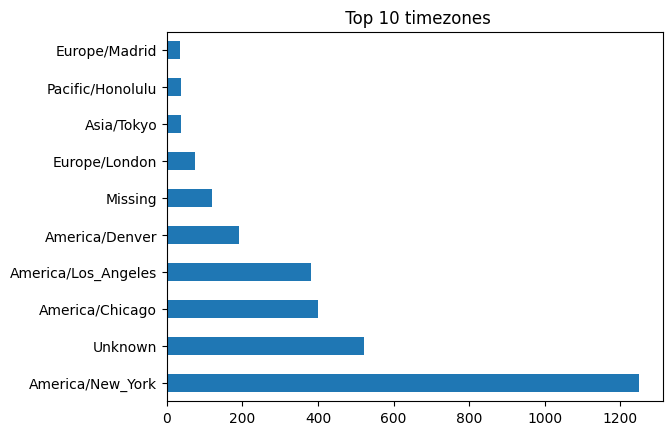

In [25]:
# Horizontal barplot
tz_counts[:10].plot(kind ='barh', rot =0, title =' Top 10 timezones')

In [26]:
# Contents of field 'a'
frame['a'][1]

'GoogleMaps/RochesterNY'

In [27]:
frame['a'][52]

'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11'

Field 'a' contains information about the browser,device or application to perform the URL sortening

In [28]:
# Parsing the data

'''
Split off the first token in the string (in this case it corresponds to the browser capability)
and make another summary of the user behavior.

'''

results = pd.Series([x.split()[0] for x in frame.a.dropna()])

Code Explanation:<br>
The code creates a pandas Series named 'results'. This series is generated by splitting each non-null value in the column 'a' pf the DataFrame 'frame; by whitespace and taking the first part of the split.<br>

**frame.a.dropna()** - it selects the 'a' column and drops any rows where the value of this column is null (NaN)<br>

**[x.split()[0] for x in frame.a.dropna()]** - this a list comprehension that iterates over each non-null value in the 'a' colmn. For each value 'x' it splits the string by whitespace using 'split()' and takes the first part(index 0) of the resulting list. this creates a list of strings<br>

**pd.Series...** - it converts the list of strings obtained from the list comprehension into a pandas Series.<br>

In summary, 'results' is a Pandas Series containg the first part of each non-null value in the 'a' column of the DataFrame 'frame' after splitting by whitespace


In [29]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [30]:
#Value counts for the first 10 entries of 'a' (agent) column
results.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
BlackBerry8520/5.0.0.592       3
Dalvik/1.4.0                   3
dtype: int64

#### Decompose the top timezones into Windows and non-Windows users

In [31]:
# Decompose the top  timezones into Windows and non-Windows users

'''
A user is on Windows if the string 'Windows' is in the agent string.
Since some of the agents are missing, they will excluded from the data

'''
cframe = frame[frame.a.notnull()]

In [32]:
# Compute a value whether each row is Windows or not


# 'cframe' is the DataFrame containing a column 'a' representing user agents
operating_system = pd.Series(np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows'))


In [33]:
operating_system[:10]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
5        Windows
6        Windows
7        Windows
8    Not Windows
9        Windows
dtype: object

In [34]:
# group the data by its timeszone column and tis new list of operating systems
by_tz_os = cframe.groupby(['tz',operating_system])

In [35]:
'''
The group counts, analogous to the value_counts function, can be computed using size.
This result is then reshaped with unstack

'''

agg_counts = by_tz_os.size().unstack().fillna(0)

In [36]:
agg_counts[:10]

,Not Windows,Windows
tz,,
,180.0,316.0
Africa/Cairo,1.0,2.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,1.0,1.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,1.0,0.0
America/Anchorage,0.0,4.0
America/Argentina/Buenos_Aires,0.0,1.0
America/Argentina/Cordoba,1.0,0.0


In [37]:
# Select the top overall time zones

'''
Construct an indirect index array from the row counts in agg_counts in order to select the 
top overall time zones

'''

#Use sort in ascending order
indexer =agg_counts.sum(1).argsort()

Explanation:<br>
**agg_counts.sum(1)** - calculates the sum of counts across each row in the datframe 'agg_counts'. The paramater '1' indicates that the sum should be counted along the rows(axis 1) <br>

**.argsort()** -returns an array of indices that would sort the elements sum calculates in the step above. The indices will be sorted in ascending order of the sum counts across each row.<br>

In summary, first **agg_counts.sum(1)** computes the sum of counts for each time zone (along each row). then, **.argsort()** sorts there sums in ascending order and returns the indices of the sorted elements. The resulting **indexer** array contains the indices that would sort the timezones on their overall counts.


In [38]:
# Overall top 10 timezones
indexer[:10]

tz
                                  21
Africa/Cairo                      51
Africa/Casablanca                 52
Africa/Ceuta                      36
Africa/Johannesburg               53
Africa/Lusaka                     34
America/Anchorage                 54
America/Argentina/Buenos_Aires    55
America/Argentina/Cordoba         56
America/Argentina/Mendoza         27
dtype: int64

In [39]:
# Use take() to select the rows in that order, then slice off the last 10 rows

count_subset =agg_counts.take(indexer)[-10:]

In [40]:
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,12.0,21.0
Europe/Madrid,15.0,19.0
Pacific/Honolulu,10.0,25.0
Asia/Tokyo,14.0,23.0
Europe/London,32.0,40.0
America/Denver,56.0,125.0
America/Los_Angeles,122.0,247.0
America/Chicago,131.0,249.0
,180.0,316.0


<Axes: title={'center': 'Top timezones by Windows and non-Windows users'}, ylabel='tz'>

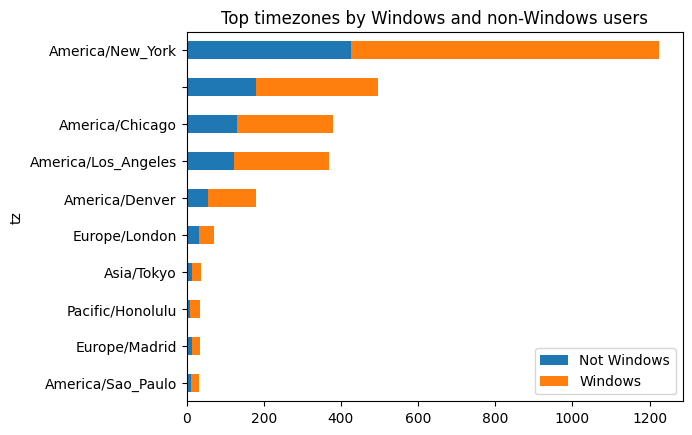

In [41]:
## Barplot
count_subset.plot(kind ='barh', stacked = True, title = 'Top timezones by Windows and non-Windows users' )

<Axes: title={'center': 'Percentage Windows and non-Windows users in top-occurring time zones'}, ylabel='tz'>

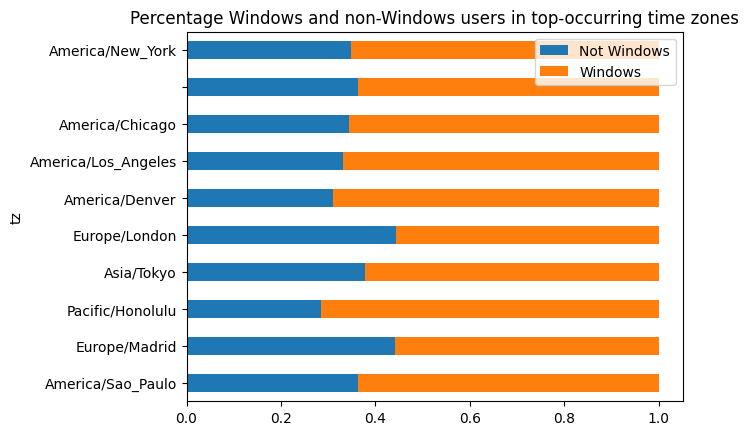

In [42]:
#Percentage Windows and non-Windows users in top-occurring time zones barplot
'''
The plot doesn't make it easy to see the relative percentage of Windows users in the samller groups,
but the rows can easily be normalized to sum to 1 then plotted again

'''

normed_subset = count_subset.div(count_subset.sum(1), axis =0)

#barplot
normed_subset.plot(kind ='barh', stacked=True, title ='Percentage Windows and non-Windows users in top-occurring time zones')


# Example 2: MovieLens 1M Dataset
GroupLens Research provides a number of collections of movie ratings data collected from users of MovieLens in the late 1990s and early 2000s. The data provides, movie ratings, movie metadata(genres and year) and demogragraphic data about the users (age,zip code,gender and occupation). Such data is often of interest in the development of recommendation systems based on machine learning algorithms.<br>

The MovieLens 1M dataset contains 1 million ratings collected from 6000 users on 4000 movies. It's spread across 3 tables: ratings, user information and movie information

### Dataset Description

##### RATINGS FILE DESCRIPTION

All ratings are contained in the file "ratings.dat" and are in the
following format:

UserID::MovieID::Rating::Timestamp

- UserIDs range between 1 and 6040 
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds since the epoch as returned by time(2)
- Each user has at least 20 ratings


##### USERS FILE DESCRIPTION

User information is in the file "users.dat" and is in the following
format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is
not checked for accuracy.  Only users who have provided some demographic
information are included in this data set.

- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"
- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"


##### MOVIES FILE DESCRIPTION

Movie information is in the file "movies.dat" and is in the following
format:

MovieID::Title::Genres

- Titles are identical to titles provided by the IMDB (including
year of release)
- Genres are pipe-separated and are selected from the following genres:

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western

- Some MovieIDs do not correspond to a movie due to accidental duplicate
entries and/or test entries
- Movies are mostly entered by hand, so errors and inconsistencies may exist


In [43]:
import pandas as pd


In [44]:
# Importing files

#File paths
file_path_movies = 'Datasets/movielens/movies.dat'
file_path_ratings = 'Datasets/movielens/ratings.dat'
file_path_users = 'Datasets/movielens/users.dat'

#Converting the *.dat files into pandas dataframe
#Movies
#Defining the columns
mnames =['MovieID','Title','Genres']
movies =pd.read_csv(file_path_movies, sep ='::',engine ='python', header =None, names =mnames)

#Ratings
rnames =['UserID','MovieID','Rating','TimeStamp']   
ratings = pd.read_csv(file_path_ratings, sep ='::',engine ='python',header =None, names=rnames)

#users
unames =['UserID','Gender','Age','Occupation','Zip']
users = pd.read_csv(file_path_users, sep ='::',engine ='python',header =None, names=unames)


Code Explanation:<br>
The **header=None** argument indicates that the file doesn't contain column names in the first row, so you need to provide column_names explicitly. The **engine='python'** is used to suppress the warning generated due to the Python parsing engine when dealing with non-standard delimiters.

In [45]:
movies[:5]

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [46]:
#Using Python's slice syntax to view the first 5 entries
ratings[:5]

,UserID,MovieID,Rating,TimeStamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [47]:
users.head(5)

,UserID,Gender,Age,Occupation,Zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [48]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [49]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   TimeStamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [50]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip         6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


Age and occupation are integers, However, in this case the occupation contains *ordinal data* which is categorical in nature, since each number represents a type of occupation

In [51]:
# Merging the datasets in order to perrform analysis

data =pd.merge(pd.merge(ratings,users),movies)

We first merge the *ratings* with *users* then merging that result with the *movies* data. Pandas infers which columns to use as the merge(join) keys based on overlapping names

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   MovieID     1000209 non-null  int64 
 2   Rating      1000209 non-null  int64 
 3   TimeStamp   1000209 non-null  int64 
 4   Gender      1000209 non-null  object
 5   Age         1000209 non-null  int64 
 6   Occupation  1000209 non-null  int64 
 7   Zip         1000209 non-null  object
 8   Title       1000209 non-null  object
 9   Genres      1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [53]:
data.head(10)

,UserID,MovieID,Rating,TimeStamp,Gender,Age,Occupation,Zip,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


In [54]:
#Integer-based indexing (retreiving the first row)
data.iloc[0] #Syntax(dataframe.iloc['row_lindex','column_index'])

UserID                                             1
MovieID                                         1193
Rating                                             5
TimeStamp                                  978300760
Gender                                             F
Age                                                1
Occupation                                        10
Zip                                            48067
Title         One Flew Over the Cuckoo's Nest (1975)
Genres                                         Drama
Name: 0, dtype: object

In [55]:
#Retreiving the second entry
data.iloc[2] 

UserID                                            12
MovieID                                         1193
Rating                                             4
TimeStamp                                  978220179
Gender                                             M
Age                                               25
Occupation                                        12
Zip                                            32793
Title         One Flew Over the Cuckoo's Nest (1975)
Genres                                         Drama
Name: 2, dtype: object

In [56]:
#Label-based indexing , display first two UserID entries
data.loc[:1,'UserID'] #Syntax(dataframe.loc['row_label','column_label'])

0    1
1    2
Name: UserID, dtype: int64

In [57]:
'''
 Aggregating the ratings grouped by the user attribute, 'Gender'. 
 
Then get the mean movie ratings for each gender
 
'''
mean_ratings = data.pivot_table(values ='Rating', index ='Title', columns='Gender', aggfunc = 'mean')

In [58]:
mean_ratings[:10]

Gender,F,M
Title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
1-900 (1994),2.000000,3.000000
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215


In [59]:
'''
Alternatively ... Use the groupby() function

mean_ratings = data.groupby('Gender').pivot_table(values='Rating',  index='Title', aggfunc='mean')

'''

"\nAlternatively ... Use the groupby() function\n\nmean_ratings = data.groupby('Gender').pivot_table(values='Rating',  index='Title', aggfunc='mean')\n\n"

Code Explanation:

The **pivot_table()** function in pandas is a powerful tool for reshaping and summarizing data. It allows one to create a spreadsheet-style pivot table as a DataFrame, where the rows represent one variable, the columns represent another variable, and the cell values are aggregated based on a third value.<br>


- **values='rating'**: Specifies that the values to be used for aggregation are from the 'rating' column.<br>
- **index='Title'**: Specifies that the 'Title' column will be used as the index (rows) in the resulting pivot table.<br>
- **columns='Gender'**: Specifies that the 'Gender' column will be used to create separate columns in the pivot table for each gender.<br>
- **aggfunc='mean'**: Specifies that the mean function should be applied to aggregate the ratings.

Aggregration refers to the process of combining multiple data values into a single value. This can involve various mathematical operations applied to the data, such as summing, averaging,counting,finding the maximum or minimum value etc.<br>

Aggregation is commonly used to summarize data and derive insights frim it. It allows condensing large amounts of data into more manageable and meaning summaries, making it easier to understand trends, patterns and relationships with the dat.

In [60]:
# Filter down to movies that received atleast 250 ratings

#Firest, grouping the data by title and the group size for each title
ratings_by_title =data.groupby('Title').size()

In [61]:
ratings_by_title[:10]

Title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [62]:
# Movies with atleast 250 ratings
active_ratings = ratings_by_title[ratings_by_title>=250]

active_ratings

Title
'burbs, The (1989)                   303
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
                                    ... 
Young Guns (1988)                    562
Young Guns II (1990)                 369
Young Sherlock Holmes (1985)         379
Zero Effect (1998)                   301
eXistenZ (1999)                      410
Length: 1216, dtype: int64

In [63]:
# Movie title with more than 250 ratings

movie_ratings_250 = data[data['Title'].isin(active_ratings.index)]

# Groupby Title and Gender and calculate mean rating
mean_ratings_active = movie_ratings_250.groupby(['Title','Gender']).agg({'Rating':'mean'})

#Pivot table for movies with more than 250 ratings
table_movies_250 = mean_ratings_active.pivot_table(values ='Rating', index ='Title',columns ='Gender')

In [64]:
table_movies_250[:15]

Gender,F,M
Title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


In [65]:
table_movies_250.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1216 entries, 'burbs, The (1989) to eXistenZ (1999)
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F       1216 non-null   float64
 1   M       1216 non-null   float64
dtypes: float64(2)
memory usage: 28.5+ KB


In [66]:
# Display top 10 films among female viewers
'''
Sort the dataframe by the F column in descending order

'''

top_female_ratings = table_movies_250.sort_values(by ='F', ascending= False)

top_female_ratings[:10]

Gender,F,M
Title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [67]:
# Display top 10 films among male viewers
top_male_ratings = table_movies_250.sort_values(by='M', ascending =False)

top_male_ratings[:10]

Gender,F,M
Title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


##### Measuring rating disagreement

In [68]:
# Finding the movies that are most divisive between male and female viewers
'''
This can be obtained by calculating the difference in ratings between genders for each movie.
Then identifying the movies with the largest differences.
'''

# Difference in male-female movie rating
table_movies_250['Rating Difference'] = table_movies_250['M'] - table_movies_250['F']

#sort by the absolute difference in ratings
divisive_movies =table_movies_250.reindex(table_movies_250['Rating Difference'].abs().sort_values(ascending = False).index)


In [69]:
table_movies_250.tail(10)

Gender,F,M,Rating Difference
Title,,,
X-Men (2000),3.682310,3.851702,0.169391
Year of Living Dangerously (1982),3.951220,3.869403,-0.081817
Yellow Submarine (1968),3.714286,3.689286,-0.025000
You've Got Mail (1998),3.542424,3.275591,-0.266834
Young Frankenstein (1974),4.289963,4.239177,-0.050785
Young Guns (1988),3.371795,3.425620,0.053825
Young Guns II (1990),2.934783,2.904025,-0.030758
Young Sherlock Holmes (1985),3.514706,3.363344,-0.151362
Zero Effect (1998),3.864407,3.723140,-0.141266


In [70]:
divisive_movies[:10]

Gender,F,M,Rating Difference
Title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
Grease (1978),3.975265,3.367041,-0.608224


In [71]:
# Movies that eleicited the most disagreemnets among viewers, independent of gender
'''
Disagreement can be measured by variance or standard deviation of the ratings

'''
#standard deviation of rating grouped by title
rating_std_by_title =data.groupby('Title')['Rating'].std()

#order series by value in descending order
ratings_by_title.sort_values(ascending =False)[:10]

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
dtype: int64

# US Baby Names

##### About Dataset
For each year of birth YYYY after 1879, we created a comma-delimited file called **yobYYYY.txt.** Each record in the individual annual files has the format **"name,sex,number,"** where name is 2 to 15 characters, sex is M (male) or F (female) and "number" is the number of occurrences of the name.<br>

Each file is sorted first on sex and then on number of occurrences in descending order. When there is a tie on the number of occurrences, names are listed in alphabetical order. This sorting makes it easy to determine a name's rank. The first record for each sex has rank 1, the second record for each sex has rank 2, and so forth.
To safeguard privacy, we restrict our list of names to those with at least 5 occurrences.

In [72]:
import pandas as pd

names =pd.read_csv('Datasets/names.csv')

In [73]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Name    1690784 non-null  object
 1   Sex     1690784 non-null  object
 2   Number  1690784 non-null  int64 
 3   Year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [74]:
names =names.rename(columns ={'Number': 'Births'})

In [75]:
names.head(10)

,Name,Sex,Births,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [76]:
# Total occurence of births for each gender
names.groupby('Sex').Births.sum()

Sex
F    159990140
M    162412587
Name: Births, dtype: int64

In [77]:
# Count number of females
(names['Sex'] == 'F').sum()

1003985

In [78]:
#Total births per year, grouped by gender
total_births =names.pivot_table(values ='Births', index ='Year', columns ='Sex', aggfunc = 'sum')

In [79]:

total_births.tail(15)

Sex,F,M
Year,,
1996,1751681,1892700
1997,1739331,1883571
1998,1765390,1909676
1999,1772139,1918267
2000,1813960,1961702
2001,1798284,1940498
2002,1794358,1938941
2003,1824406,1972439
2004,1833005,1981557


<Axes: title={'center': 'Total births between  1880 and 2010 grouped by gender'}, xlabel='Year'>

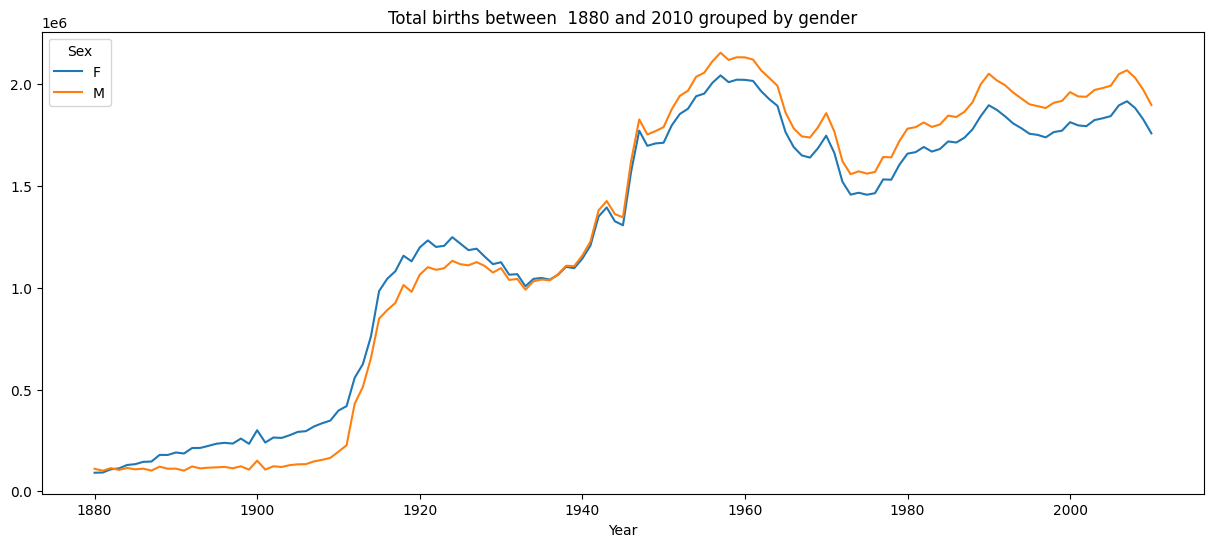

In [80]:
total_births.plot(title ='Total births between  1880 and 2010 grouped by gender', figsize= (15,6))

#### Analyzing Naming Trends

##### Objectives
- What are the most popular names within a given time period? <br>
- Which names are becoming more popular? <br>
- Which names are going out of style? <br>
- What are the most gender neutral baby names?<br>


In [81]:
# Fraction of baby names relative to the total number of births
'''
Create a user defined function that calculated the proportion of each groups 'Births' column
relative to the sum of all births in that group. Then add a new column 'Proportion' to the
group Dataframe. 

'''

#function
def add_propotion(group): 
    group['Proportion'] = group['Births']/group['Births'].sum()
    return group
    

In [82]:
# Apply the function to each group to calculate the proportions of birth within that group
names_prop =names.groupby(['Year','Sex'],group_keys= False).apply(add_propotion)
names_prop.head(10)

,Name,Sex,Births,Year,Proportion
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


Results explanation:<br>
A proportion for example 0.0777643 in the first row, would indicate that 7 out of 100 babies were given the name Mary. 

In [83]:
# Performing a sanity check to Verify that all the proportion columns will add up to 1 within all groups
names_prop.groupby(['Year','Sex'])['Proportion'].sum()

Year  Sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: Proportion, Length: 262, dtype: float64

In [84]:
# Find the top 1000 names for each year/sex combination
def get_top_1000(group):
    return group.sort_values(by ='Births', ascending =False)[:1000]

The function above takes a dataframe group as input and sorts it by the 'Births' column in descending order (ascending = False) then selects the top 1000  rows based on this sorting

In [85]:
grouped = names_prop.groupby(['Year', 'Sex'], group_keys= False)
top_1000 = grouped.apply(get_top_1000)
top_1000.tail(15)


,Name,Sex,Births,Year,Proportion
1677628,Kadin,M,197,2010,0.000104
1677627,Dillan,M,197,2010,0.000104
1677626,Clarence,M,197,2010,0.000104
1677634,Slade,M,196,2010,0.000103
1677632,Clinton,M,196,2010,0.000103
1677633,Sheldon,M,196,2010,0.000103
1677636,Keshawn,M,195,2010,0.000103
1677637,Menachem,M,195,2010,0.000103
1677635,Joziah,M,195,2010,0.000103
1677638,Bailey,M,194,2010,0.000102


In [86]:
''' 
Analyzing naming trends

Splitting the Top 100 names into the respective gender

'''

boys =top_1000[top_1000['Sex']== 'M']

girls = top_1000[top_1000['Sex'] == 'F']

In [87]:
boys.head(10)

,Name,Sex,Births,Year,Proportion
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392
947,Frank,M,3242,1880,0.029341
948,Joseph,M,2632,1880,0.023821
949,Thomas,M,2534,1880,0.022934
950,Henry,M,2444,1880,0.022119
951,Robert,M,2416,1880,0.021866


In [88]:
girls.head(10)

,Name,Sex,Births,Year,Proportion
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [89]:
# Pivot table of the total number of births by year and name
total_births =names.pivot_table(values ='Births', index ='Year', columns ='Name', aggfunc = 'sum')

In [90]:
total_births.head()

Name,Aaban,Aabid,Aabriella,Aadam,Aadan,Aadarsh,Aaden,Aadesh,Aadhav,Aadhavan,...,Zyrus,Zysean,Zyshaun,Zyshawn,Zyshon,Zyshonne,Zytavious,Zyvion,Zyyanna,Zzyzx
Year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 88496 entries, Aaban to Zzyzx
dtypes: float64(88496)
memory usage: 88.4 MB


In [92]:
total_births.shape

(131, 88496)

In [93]:
# Columns with non missing values
missing = total_births.isnull().sum()
missing[missing == 0].sample(4) # Sample 4 

Name
Gabriel    0
Annie      0
Rowena     0
Forrest    0
dtype: int64

array([<Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>], dtype=object)

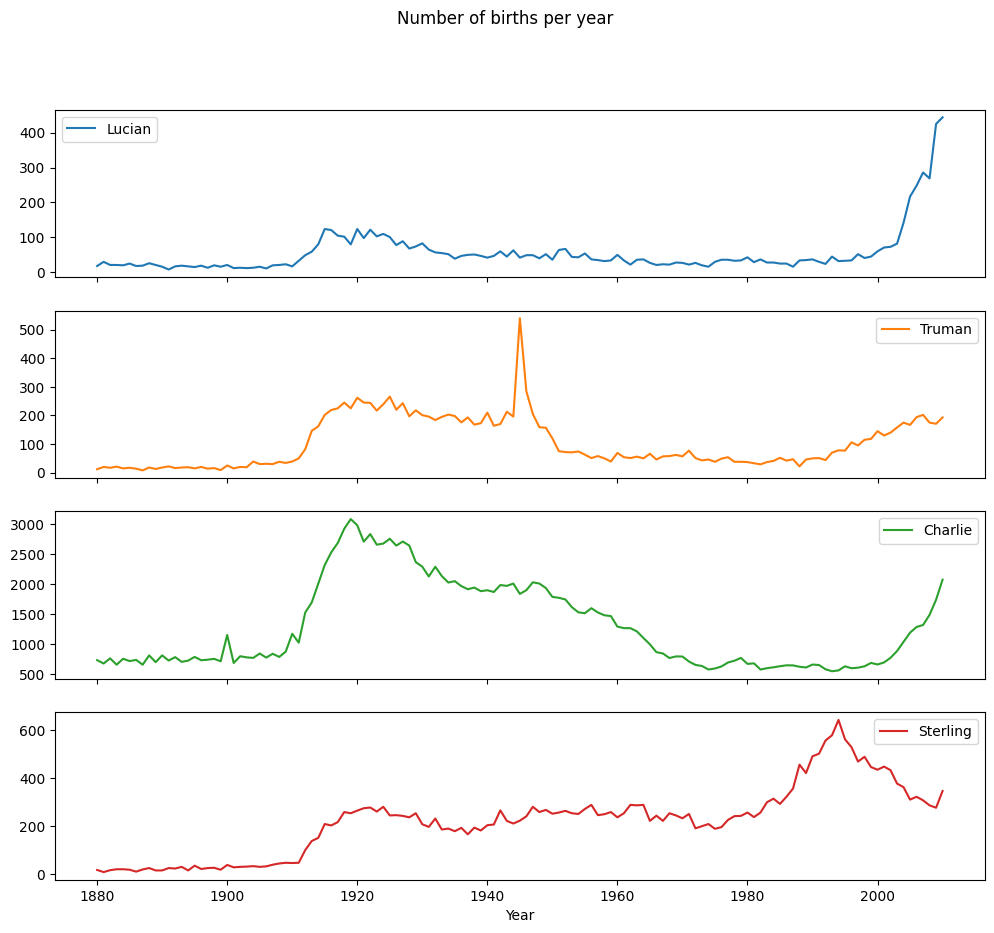

In [94]:
# Plot a handful of names from the sample 
subset =total_births[['Lucian','Truman','Charlie','Sterling']]

#Plot
subset.plot(subplots = True, figsize = (12,10), grid = False, title = 'Number of births per year' )



In [95]:
#Measuring the increase in naming diversity
table = top_1000.pivot_table(values ='Proportion', index = 'Year',columns ='Sex', aggfunc= 'sum')

<Axes: title={'center': 'Sum of top 1000 names proportion by year and gender'}, xlabel='Year'>

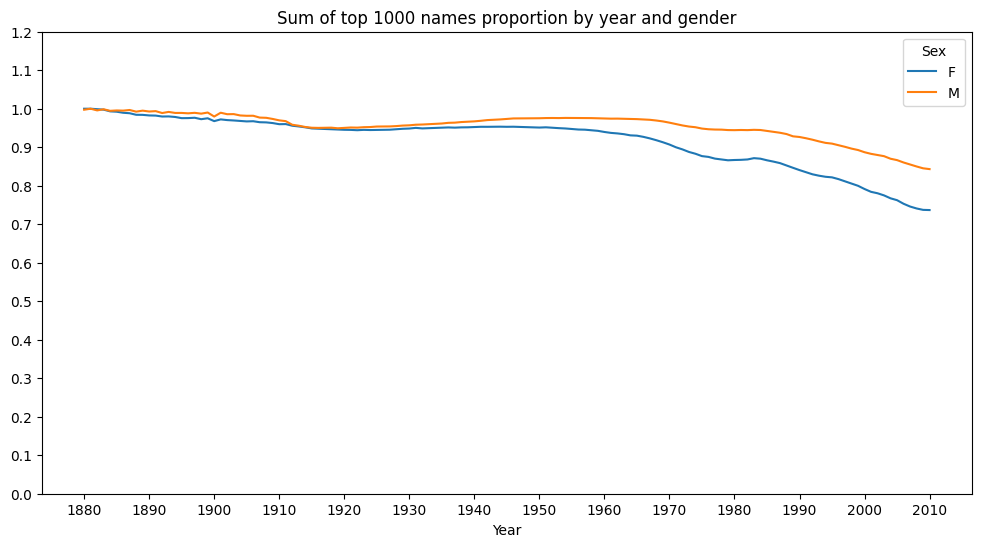

In [96]:
#plot
table.plot(title ='Sum of top 1000 names proportion by year and gender', yticks =np.linspace(0,1.2,13), xticks = range (1880,2020,10), figsize =(12,6) )

Observation:<br>
There is an increasing name diversity (exhibited by the decrease in total propostion of the top 1000)

In [97]:
'''
Distinct number of  boy names in 2010, taken in order of popularity from highest to lowest,
in the top 50% of births
'''
# Filter the Datframe boys for year 2010
df = boys[boys['Year'] ==2010]

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1676644 to 1677645
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        1000 non-null   object 
 1   Sex         1000 non-null   object 
 2   Births      1000 non-null   int64  
 3   Year        1000 non-null   int64  
 4   Proportion  1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [99]:
df.shape

(1000, 5)

In [100]:
df.head()

,Name,Sex,Births,Year,Proportion
1676644,Jacob,M,21875,2010,0.011523
1676645,Ethan,M,17866,2010,0.009411
1676646,Michael,M,17133,2010,0.009025
1676647,Jayden,M,17030,2010,0.008971
1676648,William,M,16870,2010,0.008887


In [101]:
'''
Sort proportion column in descending order,
Then determine the most popular names it takes to reach 50%

Taking the cumulative sum or the proportion then calling the method searchsorted() returns the position of the cumulative sum

'''
proportion_cumsum = df.sort_values(by ='Proportion', ascending= False)['Proportion'].cumsum()

In [102]:
proportion_cumsum[:10]

1676644    0.011523
1676645    0.020934
1676646    0.029959
1676647    0.038930
1676648    0.047817
1676649    0.056579
1676650    0.065155
1676651    0.073414
1676652    0.081528
1676653    0.089621
Name: Proportion, dtype: float64

In [103]:
# Position of the cumulative sum at 0.5
proportion_cumsum.searchsorted(0.5)

116

Note:
Since arrays are zero-indexed, adding 1 to this result will give 117

In [104]:
# Cumulative sum  for the year 1900
df =boys[boys['Year'] == 1900]

cumsum_1900 = df.sort_values(by = 'Proportion', ascending = False)['Proportion'].cumsum()

cumsum_1900.searchsorted(0.5) +1

25

In [105]:
# Function for cumulative sum to be applied in the year/sex combination

def get_quantile_count (group, q =0.5):
    group = group.sort_values(by ='Proportion', ascending  = False)
    return group['Proportion'].cumsum().searchsorted(q)+1

In [106]:
#Function use
diversity = top_1000.groupby(['Year','Sex']).apply(get_quantile_count)
diversity =diversity.unstack('Sex') # reshapes the result moving the 'Sex' level of the index to columns, making it easier to work with.
diversity.head()

Sex,F,M
Year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<Axes: title={'center': 'Number of popular names in top 50% '}, xlabel='Year'>

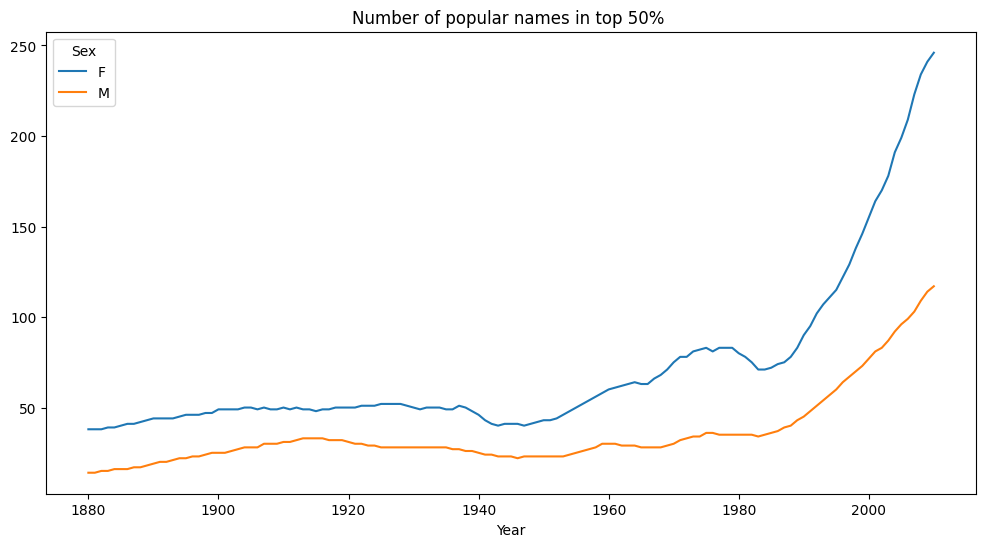

In [107]:
diversity.plot(title ='Number of popular names in top 50% ', figsize = (12,6))

Observation:<br>
Girl names have always been more diverse than boy names, and they have only become more so over time

#### The Last letter revolution
In 2007, a baby name researcher pointed out that the distribution of buy names by final letter has changed significantly over tthe last 100 years. Let's check this..

In [123]:
# Aggregate all of the births in the full year datadet by Year, Sex and Final letter

#extract last letter from column name
get_last_letter = lambda x:x[-1]
last_letters = names_prop['Name'].map(get_last_letter)
last_letters.Name = 'Last_Letter'

In [121]:
last_letters[:10]

0    y
1    a
2    a
3    h
4    e
5    t
6    a
7    e
8    a
9    h
Name: Name, dtype: object

In [129]:
# Create a pivot table based on the last letter, sex, and year
table = names_prop.pivot_table(values = 'Births', index = last_letters, columns = ['Sex','Year'], aggfunc = sum)

In [131]:
table[:3]

Sex         F                                                                 \
Year     1880     1881     1882     1883     1884     1885     1886     1887   
Name                                                                           
a     31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0  48942.0   
b         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c         NaN      NaN      5.0      5.0      NaN      NaN      NaN      NaN   

Sex                     ...        M                                      \
Year     1888     1889  ...     2001     2002     2003     2004     2005   
Name                    ...                                                
a     59442.0  58631.0  ...  39124.0  38815.0  37825.0  38650.0  36838.0   
b         NaN      NaN  ...  50950.0  49284.0  48065.0  45914.0  43144.0   
c         NaN      NaN  ...  27113.0  27238.0  27697.0  26778.0  26078.0   

Sex                                                
Year     2006     2007     2008     2009     2010  
Name                                               
a     36156.0  34654.0  32901.0  31430.0  28438.0  
b     42600.0  42123.0  39945.0  38862.0  38859.0  
c     26635.0  26864.0  25318.0  24048.0  23125.0  

[3 rows x 262 columns]

In [133]:
# Selecting three representative years spanning the history
subtable = table.reindex(columns=[1910,1960,2010],level ='Year')
subtable.head()

Sex          F                            M                    
Year      1910      1960      2010     1910      1960      2010
Name                                                           
a     108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b          NaN     694.0     450.0    411.0    3912.0   38859.0
c          5.0      49.0     946.0    482.0   15476.0   23125.0
d       6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e     133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [134]:
#Normalize the table by total births to compute a new table containing total births for each sex ending in each letter
subtable.sum()

Sex  Year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [137]:
letter_prop = subtable/subtable.sum().astype(float)
letter_prop[:5]

Sex          F                             M                    
Year      1910      1960      2010      1910      1960      2010
Name                                                            
a     0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b          NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c     0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d     0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e     0.336941  0.215133  0.178415  0.147556  0.083853  0.067959

<Axes: title={'center': 'Female'}, xlabel='last letter '>

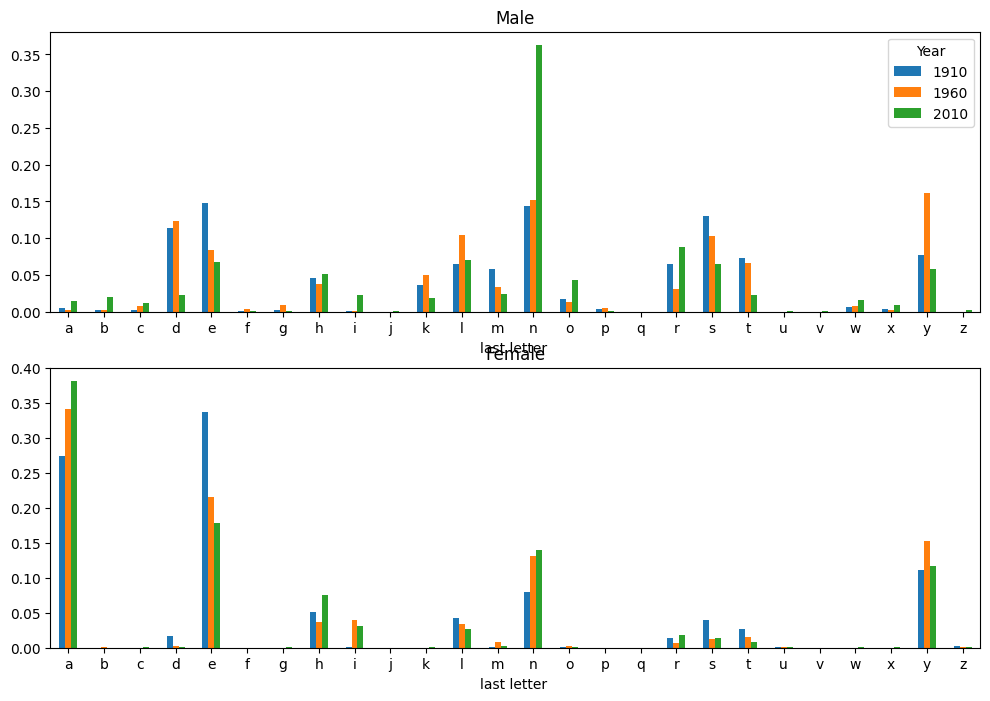

In [147]:
#Barplot for each gender broken down by year
fig, axes = plt.subplots (2,1, figsize =(12,8))
letter_prop['M'].plot(kind ='bar', rot =0, ax =axes[0], title ='Male', xlabel = 'last letter ')
letter_prop['F'].plot(kind ='bar', rot =0, ax =axes[1], title ='Female', xlabel = 'last letter ' ,legend =False)

Observation:<br>
Boy names ending in 'n' have experienced a significant growth since the 1960s

In [148]:
# Normalize the table by year and sex and select a subset of letters for boy names, finally transposing to make each column a time series
letter_prop = table/table.sum().astype(float)

In [151]:
# Select specific latters from the 'M' column and transpose
ts =letter_prop.loc[['d','n','y'],'M'].T
ts.head()

Name,d,n,y
Year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


<Axes: title={'center': 'proportion of boys born with names ending with d/n/y over time'}, xlabel='Year'>

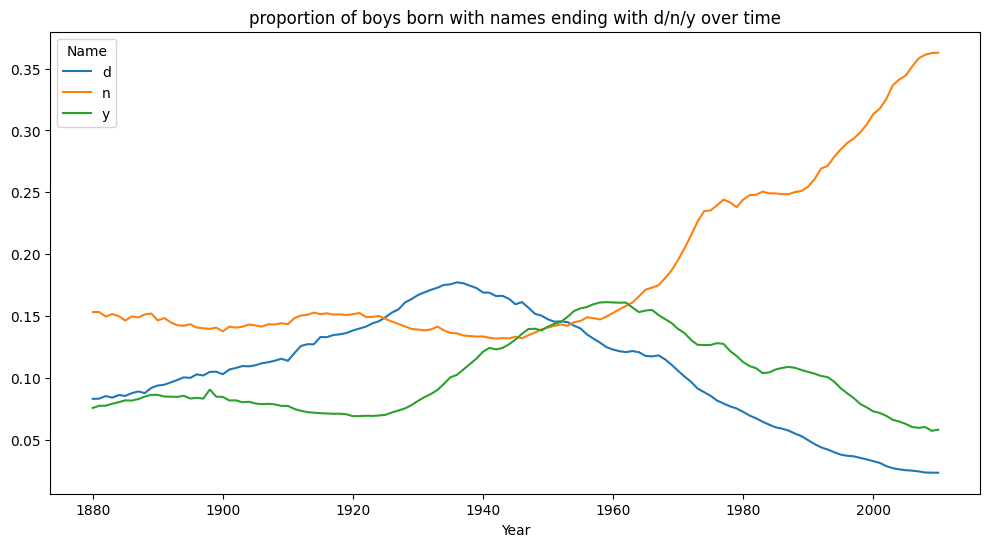

In [153]:
# Plot for trends over time
ts.plot(title ='proportion of boys born with names ending with d/n/y over time', figsize =(12,6))

#### Boy names that became girl names (and vice versa)

In [157]:
# Filter out unique names
all_names =top_1000['Name'].unique()

In [159]:
# Create a boolean mask to identify names containing 'lesl' (case insensitive)
mask =np.array(['lesl'in x.lower() for x in all_names])

In [160]:
#Filter unique names containing lesl
lesl_names = all_names[mask]

In [161]:
lesl_names

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [163]:
# Filter down to just those names and sum births grouped by 'lesl names'  to see relative frequency
filtered = top_1000[top_1000['Name'].isin(lesl_names)]

filtered.groupby('Name').Births.sum()

Name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: Births, dtype: int64

In [164]:
table = filtered.pivot_table(values = 'Births', index ='Year', columns ='Sex', aggfunc =sum)

In [166]:
# Normalize values in the dataframe table by dividing each row by the sum of its values.
# This operation is performed along axis 1, which means the sum is calculated horizontally (across columns) for each row
table =table.div(table.sum(1), axis =0)

table.tail()

Sex,F,M
Year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


<Axes: xlabel='Year'>

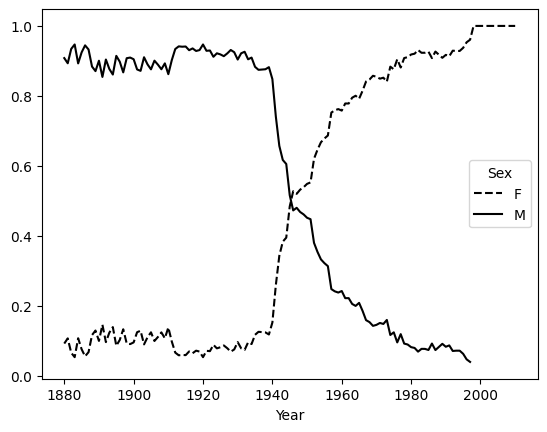

In [169]:
table.plot(style={'M': 'k-', 'F': 'k--'})

Code explanation:
**style={'M': 'k-', 'F': 'k--'}**: This parameter specifies the line style for each series in the plot. It is a dictionary where the keys are the series names ('M' and 'F' in this case), and the values are strings specifying the line style. 'k-' represents a solid black line, and 'k--' represents a dashed black line. This means that the 'M' series will be plotted with a solid line and the 'F' series will be plotted with a dashed line.